In [393]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Bước 1: Reading and Understanding the Data

In [395]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [396]:
cars.shape

(205, 26)

In [397]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [398]:
#Thay đổi kiểu dữ liệu 
features = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem", "symboling"]
def convert_cat(cars, features):
    for feature in features:
        cars[feature] = cars[feature].astype("category") 
convert_cat(cars, features)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    category
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [399]:
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [400]:
cars.describe(include=['category'])

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,6,2,2,2,5,3,2,7,7,8
top,0,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,185,168,115,96,120,202,148,159,94


## Bước 2 : Data Cleaning and Preparation


In [401]:
#Tách tên công ty từ cột CarName
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
# Xóa cột CarName
cars.drop(['CarName'],axis=1,inplace=True)

In [402]:
cars.drop(['car_ID'],axis=1,inplace=True)
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [403]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Step 3: Visualizing the data


#### Khảo sát chung về phân phối giá xe và sự chênh lệch giữa các giá xe


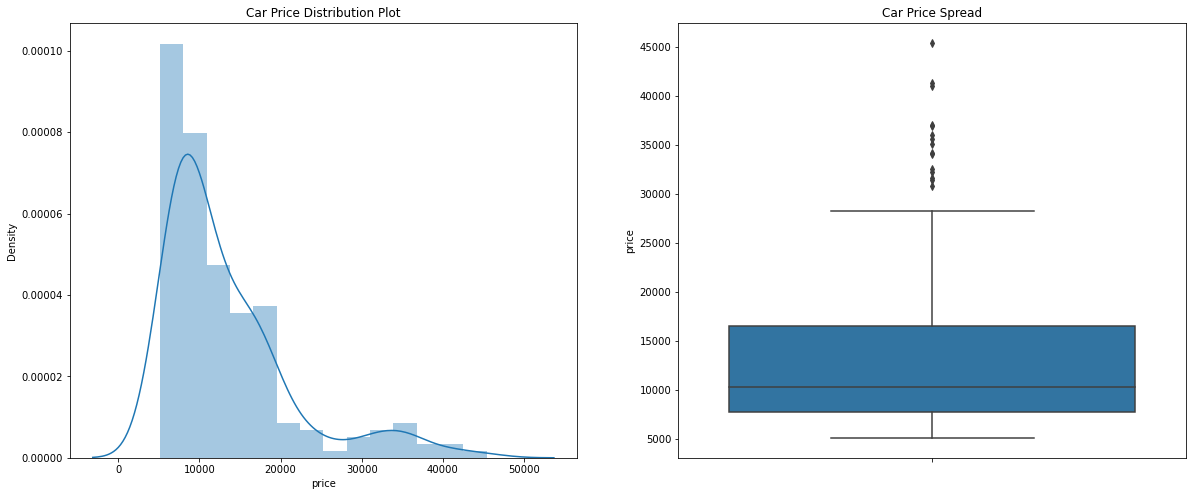

In [404]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

##### Observation 
- Fig 1:
    - Biểu đồ bị lệch hẳn sang phải (giá trị trung vị < giá trị trung bình) và dữ liệu đa phần nằm trong khoảng từ 5000 - 15000, điều này có nghĩa là hầu hết các mức giá trong tập dữ liệu đều thấp (Dưới 15.000). 
    - Bên cạnh đó, vẫn có những giá xe nằm trong khoảng từ 30000 - 45000
- Fig 2:
    - Có sự khác biệt đáng kể giữa giá trị trung bình và giá trị trung vị của phân phối giá.
    - Có các giá trị ngoại lai rơi vào khoảng từ 30000 - 45000 

In [405]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


- Các điểm dữ liệu chênh lệch xa so với mức trung bình, điều này cho thấy giá xe có sự chênh lệch cao (85% giá dưới 18.500, trong khi 15% còn lại nằm trong khoảng 18.500 đến 45.400).

#### Step 3.1 : Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

#### Company Name

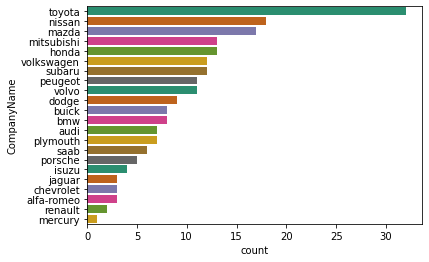

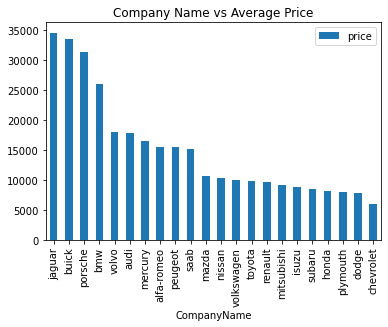

In [406]:
sns.countplot(data = cars, y = "CompanyName",
              order = cars['CompanyName'].value_counts(ascending = False).index,
              palette = "Dark2")


df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

##### Observation
- Fig 1:
    - Các dòng xe của `Toyota` trên thị trường chiếm số lượng lớn (hơn 30 dòng) và gấp gần 1/2 dòng xe của hãng xe đứng thứ hai là `Nissan`
    - Các dòng xe của các hãng xe có giá thành cao như `Jaguar` và `Buick` thì lần lượt chiếm các vị trí 18 và 11.
- Fig 2:
    - `Jaguar` và` Buick` là hai hãng xe có trung bình giá xe cao nhất.
    - `Toyota` có giá thấp hơn mức giá trung bình của các giá trị trung bình trong biểu đồ

#### Fuel type

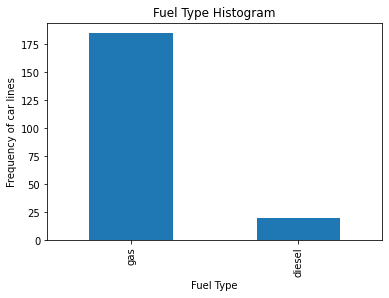

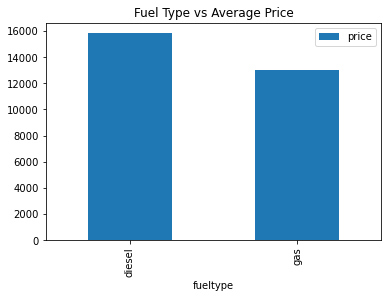

In [407]:
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of car lines')

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

##### Observation
- Fig 1: So sánh về việc sử dụng nhiên liệu xăng và dầu giữa các hãng xe

- Fig 2: So sánh về giá thành trung bình của hai loại nhiên liệu xăng và dầu
    - Dầu `diesel` có giá thành trung bình cao hơn `gas` (gasline).

#### Carbody

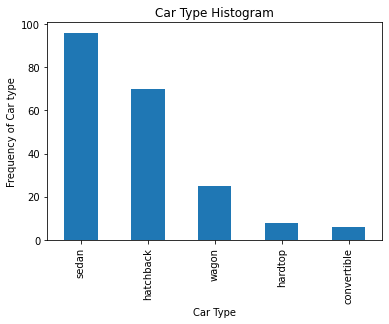

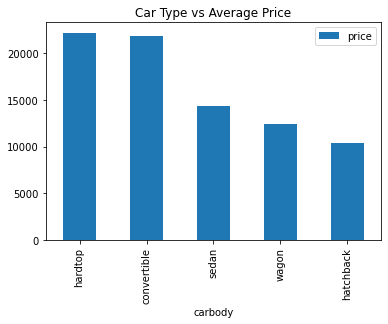

In [408]:
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

#sns.catplot(data=cars, x= 'CompanyName', hue ='carbody', kind='count', height=7, aspect=2.4)

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

##### Observation
- Fig1: 
    - `sedan` là loại xe được ưa chuộng hàng đầu.
- Fig2: 
    - `hardtop` và `convertible` có mức giá tương đương nhau và lần lượt chiếm mức giá cao nhất và nhì.

#### Symboling

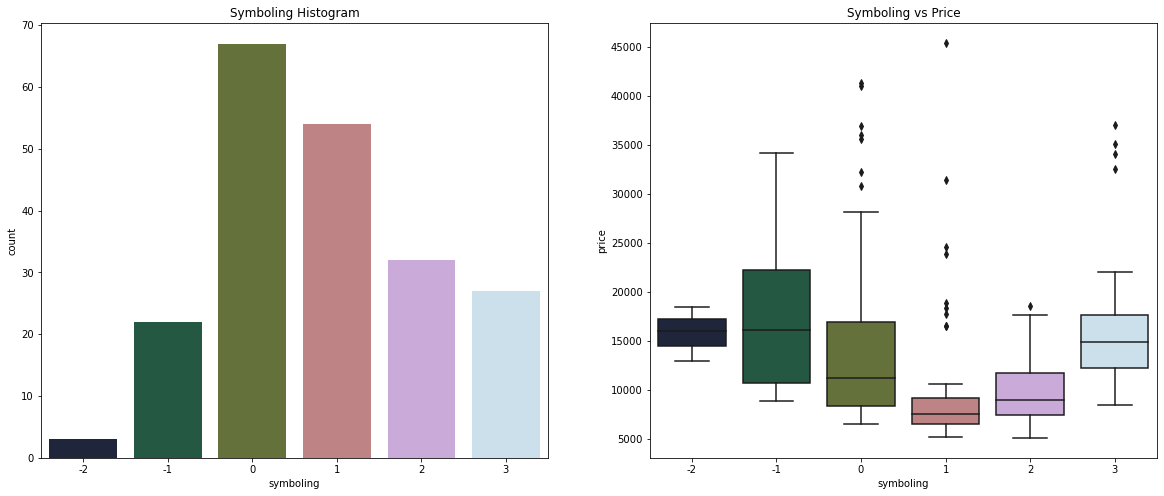

In [409]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

##### Observation
- Fig1:
    - Các xe có mức độ rủi ro so với giá xe bằng `0` chiếm số lượng lớn nhất (được bán ra nhiều nhất) và các xe có mức độ rủi ro so với giá xe bằng `1` chiếm số lượng lớn thứ hai.
- Fig2:
    - Những chiếc xe có mức độ rủi ro so với giá xe bằng `-1` thì có giá thành cao (mức độ rủi ro so với giá xe của các xe này là `-1` (thấp) được coi như là ở mức an toàn, khá tốt), nhưng các xe có mức độ rủi ro so với giá xe cao như là `3` cũng có giá trị khá cao và nó tương đương với giá với những xe có mức độ rủi ro so với giá xe là `-2`. Giá xe của những xe có mức độ rủi ro so với giá xe là `1` là thấp nhất.

#### Engine type

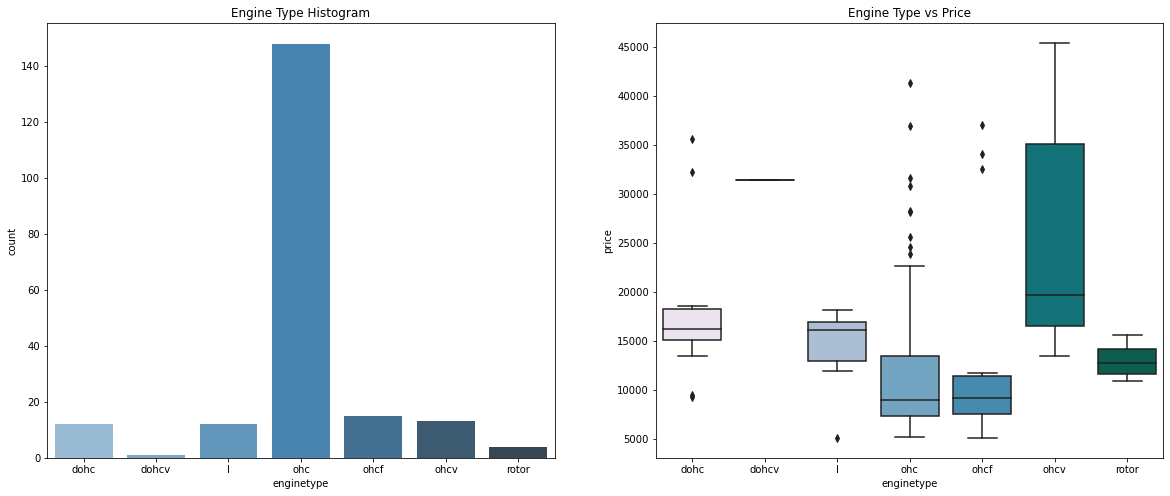

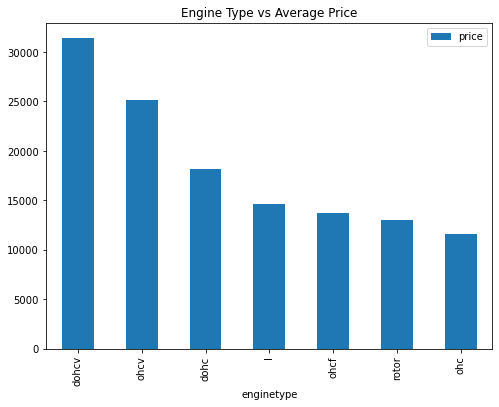

In [410]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


##### Observation
- Fig1:
    - Loại động cơ `ohc` dường như là loại được ưa chuộng nhất.
- Fig2:
    - `ohcv` có mức giá cao nhất (Trong khi` dohcv` chỉ có một hàng), `ohc` và` ohcf` có mức giá thấp.
- Fig3: 

#### Door number

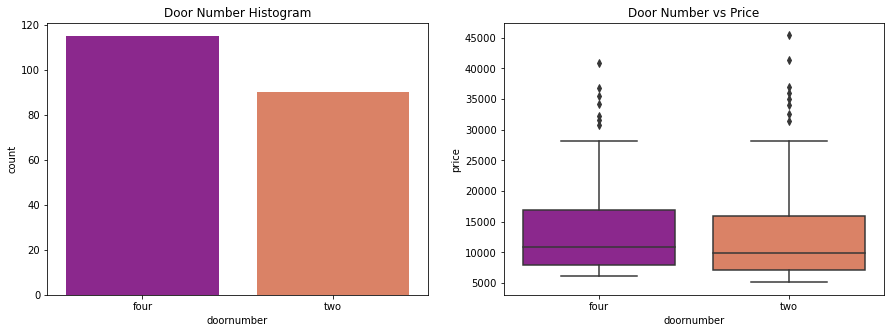

In [411]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

##### Observation
- Fig1:
- Fig2:
- Kết luận:
    - Biến số `doornumber` không ảnh hưởng nhiều đến giá. Không có sự khác biệt đáng kể giữa các danh mục trong đó.


#### Aspiration 

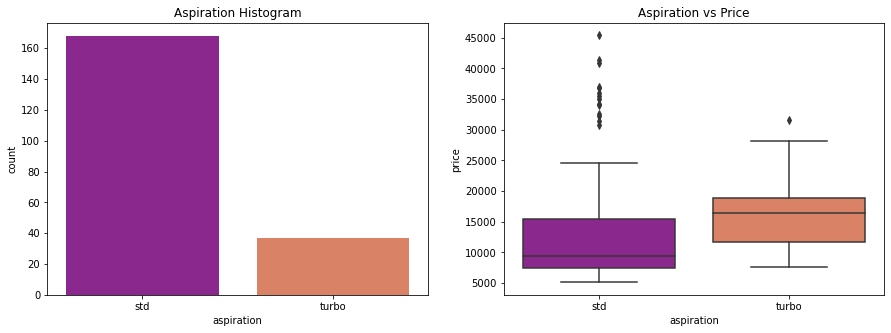

In [412]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

##### Observation
- Fig1:
    - Động cơ hút khí `std` chiếm số lượng lớn hơn rất nhiều so với `turbo`
- Fig2:
    - Động cơ hút khí `turbo` có mức giá cao hơn so với `std` (mặc dù `std` có một số mức giá cao hơn)

#### Engine location, Cylinder number, fuelsystem and drivewheel

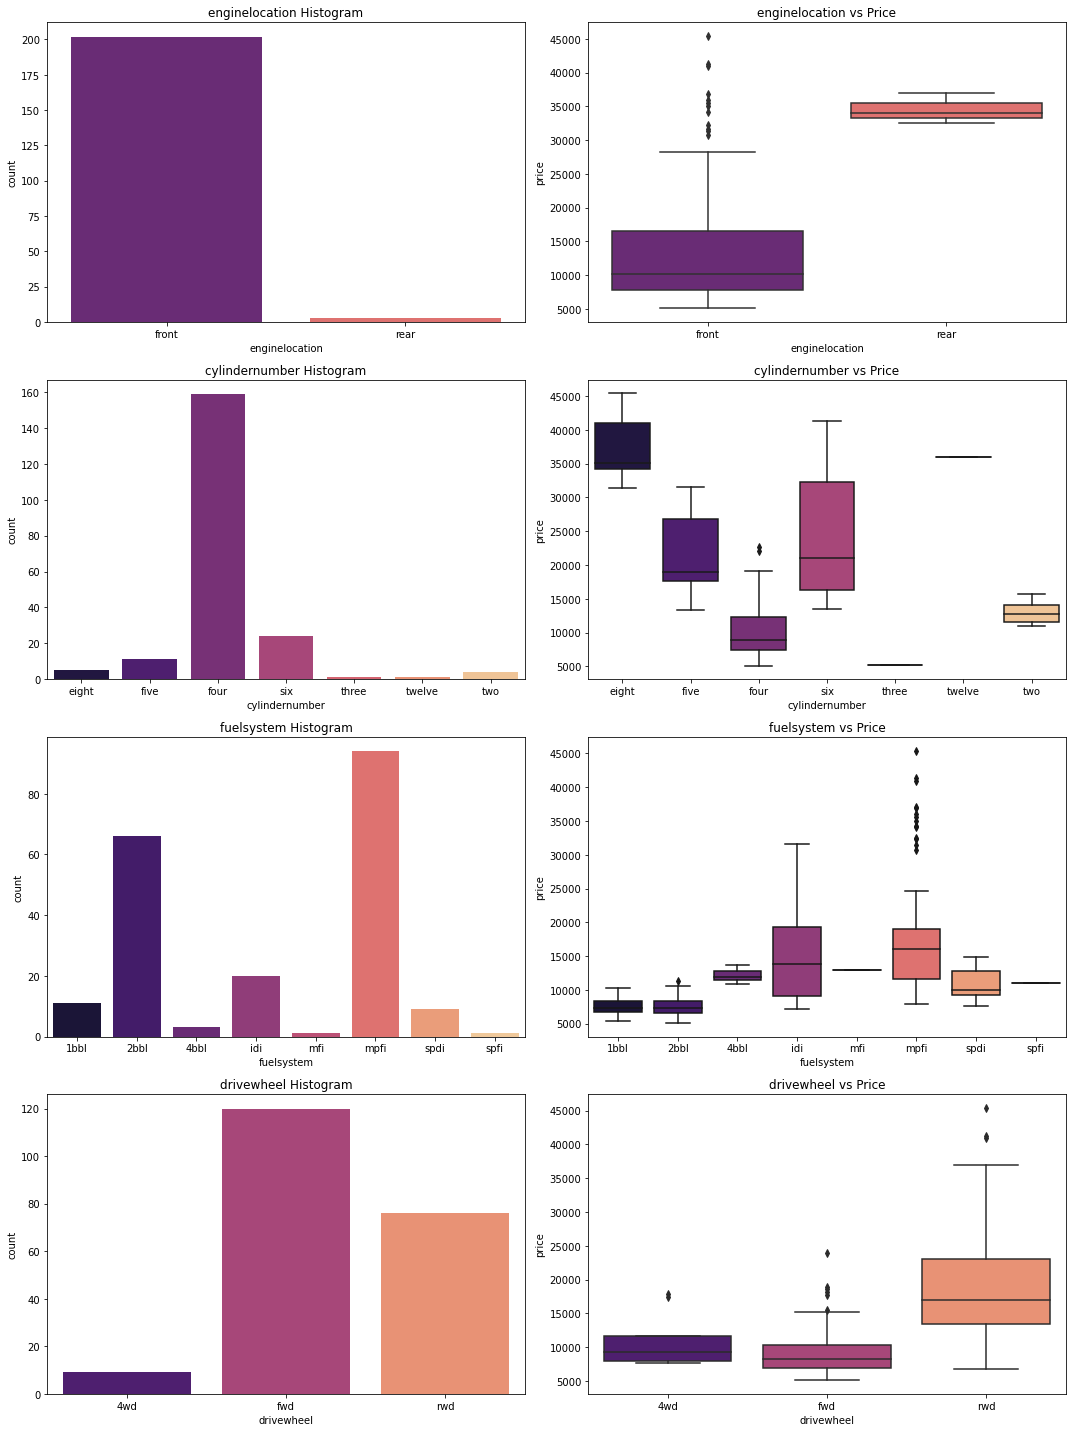

In [413]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

##### Observation
- Fig1+2:
    - Rất ít điểm dữ liệu cho các danh mục `enginelocation` để đưa ra suy luận.
- Fig3+4:
    - Số lượng xi lanh phổ biến nhất là `four`,` six` và `five`. Mặc dù xi lanh `eight` có mức giá cao nhất.
- Fig5+6:
    - `mpfi` và `2bbl` là loại hệ thống nhiên liệu phổ biến nhất. `mpfi` và` idi` có mức giá cao nhất. Nhưng có rất ít dữ liệu cho các danh mục khác để đưa ra bất kỳ suy luận có ý nghĩa nào
- Fig7+8:
    - Một sự khác biệt rất đáng kể trong hệ dẫn động. Hầu hết các xe ô tô có tầm xa đều thích bánh lái `rwd` hơn.

#### Step 3.2 : Visualising numerical data

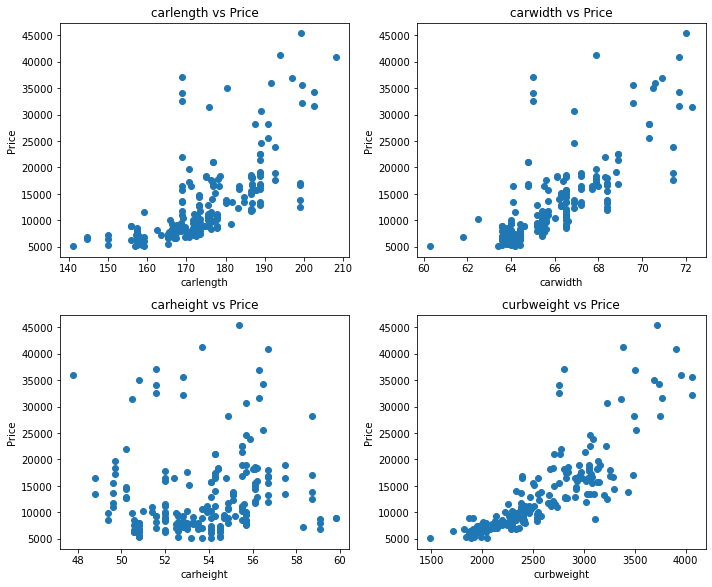

In [414]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

##### Observation
- Fig1:
- Fig2:
- Kết luận:
    - `carwidth`, `carlength` và `curbweigth` dường như có mối tương quan thuận với `price`.
    - `carheight` không cho thấy bất kỳ xu hướng đáng kể nào với giá cả.

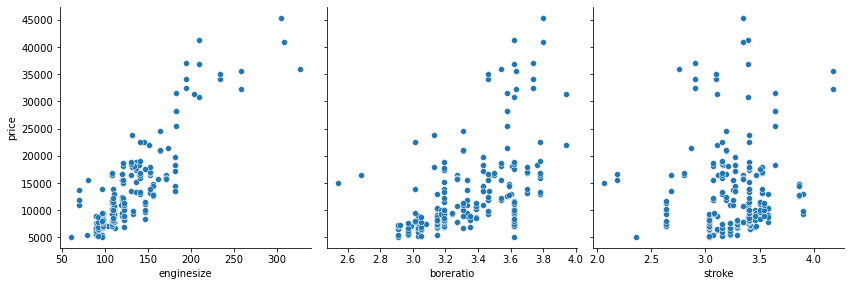

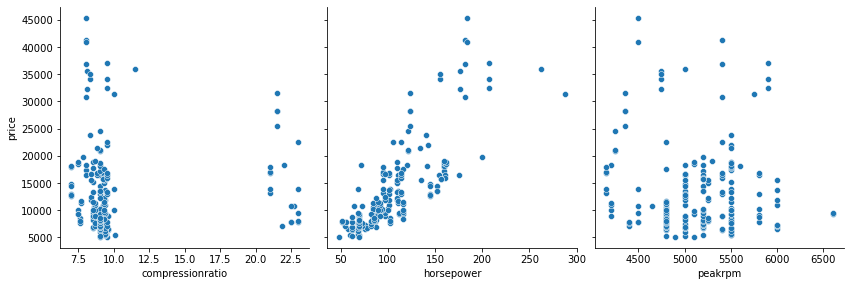

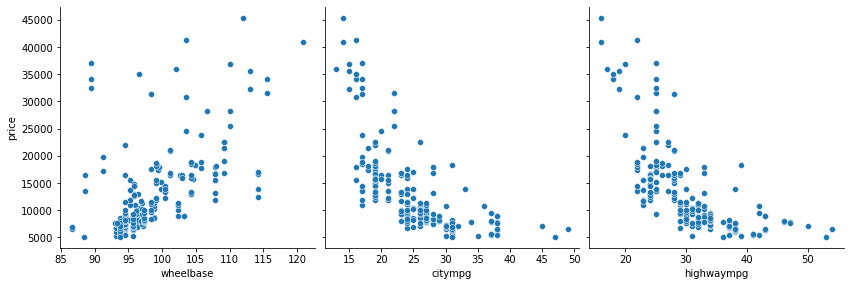

In [415]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

##### Observation
- Fig1:
- Fig2:
- Kết luận:
    - `enginesize` ,`enginesize`, `horsepower`,`wheelbase` - dường như có mối tương quan thuận với giá cả.
    - `citympg`, `highwaympg` - dường như có mối tương quan nghịch với giá cả.
